<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [3]:
iris = load_iris()
data = preprocessing.scale(iris.data[:,:2])

labels = np.array([1 if x==0 else 0 for x in iris.target])
x_train,x_test,y_train,y_test = train_test_split(data,labels) 

In [4]:
class LogisticRegressuin:
  def __init__(self, lr=0.00001, n_iter = 1000):
    self.lr=lr
    self.n_iter=n_iter
    self.W = None
    self.b = None

  def logit(self,x):
      return 1/(1+np.exp(-x))

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.W = np.zeros(n_features)
    self.b = 0

    #gradient loop
    for _ in range(self.n_iter):
      y_pred = self.logit(np.dot(X, self.W) + self.b)
      dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
      db = (1/n_samples) * np.sum(y_pred-y)

      self.W -= self.lr * dw
      self.b -= self.lr * db


  def predict(self,X):
    y_predicted_prob = self.logit(np.dot(X, self.W) + self.b)
    y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted_prob]
    return y_predicted_class


  def score(self,X,y):
    y_predicted_prob = self.logit(np.dot(X, self.W) + self.b)
    y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted_prob]
    accuracy = np.sum(y==y_predicted_class) / len(y)
    return accuracy


  def percision(self,X,y):
    y_predicted_prob = self.logit(np.dot(X, self.W) + self.b)
    y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted_prob]
    TP_and_FP = y_predicted_class.count(1)
    TP = np.sum([1 for i in range(len(y)) if y_predicted_class[i]==y[i]==1])
    precision = TP / TP_and_FP
    return precision


In [5]:
LR = LogisticRegressuin(lr=0.0001, n_iter = 10000)
LR.fit(x_train,y_train)

print('accuracy score {:.2%}'.format(LR.score(x_test, y_test)))
print('percision score {:.2%}'.format(LR.percision(x_test, y_test)))  

accuracy score 100.00%
percision score 100.00%


In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train,y_train)

print('Sklearn score {:.2%}'.format(clf.score(x_test, y_test)))


Sklearn score 100.00%


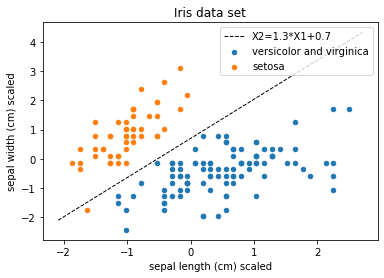

In [7]:
fig, ax = plt.subplots()
plt.scatter(*data[labels==0].T, s=20,label=iris.target_names[1] + ' and ' + iris.target_names[2])
plt.scatter(*data[labels==1].T, s=20, label=iris.target_names[0])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Retrieve the model parameters.
b = LR.b
w1, w2 = LR.W[0], LR.W[1]

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.

xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw=1, ls='--', label = "X2={:.2}*X1+{:.2}".format(m,c))


plt.ylabel(iris.feature_names[1] + ' scaled')
plt.xlabel(iris.feature_names[0] + ' scaled')
plt.title('Iris data set')  
plt.legend(loc='upper right')         
plt.show()

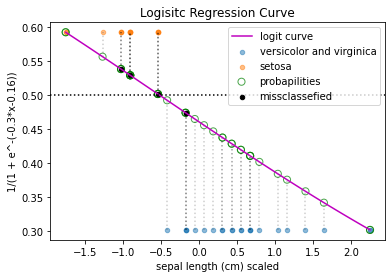

In [9]:
LR = LogisticRegressuin(lr=0.0001, n_iter = 10000)
LR.fit(x_train[:,:1],y_train)


x_test = x_test[:,:1]
y_prob = LR.logit(np.dot(x_test, LR.W) + LR.b)
y_pred = np.array(LR.predict(x_test))

fig, ax = plt.subplots()
plt.scatter(x_test[y_pred==0],
            y_pred[y_pred==0]+y_prob.min(),
            s=20,alpha=0.5,
            label=iris.target_names[1] + ' and ' + iris.target_names[2])

plt.scatter(x_test[y_pred==1],
            y_pred[y_pred==1]*y_prob.max(),
            s=20,alpha=0.5,
            label=iris.target_names[0])


x_values = np.linspace(x_test.min(), x_test.max(), 100).reshape(-1,1)
y_values = LR.logit(np.dot(x_values, LR.W) + LR.b)
plt.plot(x_values, y_values,'-m',label='logit curve')

plt.scatter(x_test,
            y_prob,s=50,
            label='probapilities',
            marker ='o',
            alpha=0.7,facecolors='none',
            edgecolors='g')



missclassefied = np.array([(x_test[i][0],y_prob[i]) for i in range(len(y_pred)) if y_test[i]!=y_pred[i]])
plt.scatter(missclassefied[:,0],
            missclassefied[:,1],
            s=20,
            marker = 'o' ,
            color='k',
            label='missclassefied')

for i in range(len(y_pred)):
    if y_pred[i] == 0:
        plt.vlines(x=x_test[i],alpha=0.2,linestyle='dotted',ymin=y_prob.min(), ymax=y_prob[i])

    #else: plt.axvline(x=x_test[i], ymin=y_prob[i], ymax=y_prob.max(),alpha=0.2,linestyle='dotted')
    else: plt.vlines(x=x_test[i],alpha=0.2,linestyle='dotted',ymin=y_prob[i], ymax=y_prob.max())


plt.axhline(y=0.5, color='k', linestyle='dotted')
plt.title('Logisitc Regression Curve')
plt.xlabel(iris.feature_names[0] + ' scaled')
if LR.b < 0 :
  plt.ylabel("1/(1 + e^-({:.2}*x{:.2}))".format(LR.W[0],LR.b))
else: plt.ylabel("1/(1 + e^-({:.2}*x+{:.2}))".format(LR.W[0],LR.b))

plt.legend()